In [1]:
commodity_dict = {
    "arhar": "static/Arhar.csv",
    "bajra": "static/Bajra.csv",
    "barley": "static/Barley.csv",
    "copra": "static/Copra.csv",
    "cotton": "static/Cotton.csv",
    "sesamum": "static/Sesamum.csv",
    "gram": "static/Gram.csv",
    "groundnut": "static/Groundnut.csv",
    "jowar": "static/Jowar.csv",
    "maize": "static/Maize.csv",
    "masoor": "static/Masoor.csv",
    "moong": "static/Moong.csv",
    "niger": "static/Niger.csv",
    "paddy": "static/Paddy.csv",
    "ragi": "static/Ragi.csv",
    "rape": "static/Rape.csv",
    "jute": "static/Jute.csv",
    "safflower": "static/Safflower.csv",
    "soyabean": "static/Soyabean.csv",
    "sugarcane": "static/Sugarcane.csv",
    "sunflower": "static/Sunflower.csv",
    "urad": "static/Urad.csv",
    "wheat": "static/Wheat.csv"
}

In [9]:
annual_rainfall = [29, 21, 37.5, 30.7, 52.6, 150, 299, 251.7, 179.2, 70.5, 39.8, 10.9]
base = {
    "Paddy": 1245.5,
    "Arhar": 3200,
    "Bajra": 1175,
    "Barley": 980,
    "Copra": 5100,
    "Cotton": 3600,
    "Sesamum": 4200,
    "Gram": 2800,
    "Groundnut": 3700,
    "Jowar": 1520,
    "Maize": 1175,
    "Masoor": 2800,
    "Moong": 3500,
    "Niger": 3500,
    "Ragi": 1500,
    "Rape": 2500,
    "Jute": 1675,
    "Safflower": 2500,
    "Soyabean": 2200,
    "Sugarcane": 2250,
    "Sunflower": 3700,
    "Urad": 4300,
    "Wheat": 1350

}

In [118]:
import pandas as pd

production=pd.read_csv('bajra.csv')
production['Year']=pd.to_datetime(production['Year'],format="%Y")


In [119]:
production

,Year,Production
0,2000-01-01,5.78
1,2001-01-01,6.76
2,2002-01-01,8.28
3,2003-01-01,4.72
4,2004-01-01,12.11
5,2005-01-01,7.93
6,2006-01-01,7.68
7,2007-01-01,8.42
8,2008-01-01,9.97
9,2009-01-01,8.89


In [120]:

production.set_index('Year',inplace=True)
from statsmodels.tsa.stattools import adfuller

In [121]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [122]:
adfuller_test(production['Production'])



ADF Test Statistic : -3.5202213677174936
p-value : 0.007482702189052032
#Lags Used : 1
Number of Observations Used : 17
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [123]:
production['WPI First Difference'] = production['Production'] - production['Production'].shift(1)

In [124]:
production['Production'].shift(1)

Year
2000-01-01      NaN
2001-01-01     5.78
2002-01-01     6.76
2003-01-01     8.28
2004-01-01     4.72
2005-01-01    12.11
2006-01-01     7.93
2007-01-01     7.68
2008-01-01     8.42
2009-01-01     9.97
2010-01-01     8.89
2011-01-01     6.51
2012-01-01    10.37
2013-01-01    10.28
2014-01-01     8.74
2015-01-01     9.25
2016-01-01     9.18
2017-01-01     8.07
2018-01-01     9.73
Name: Production, dtype: float64

<AxesSubplot:xlabel='Year'>

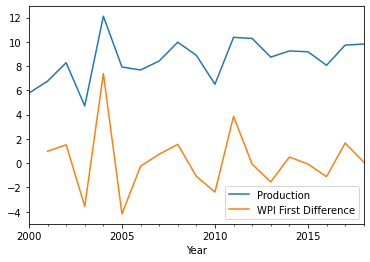

In [125]:
import matplotlib.pyplot as plt
production.plot()

In [126]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [127]:
production['WPI First Difference'] = production['Production'] - production['Production'].shift(10)

In [93]:
production.tail(30)

,Production,WPI First Difference
Year,,
1970-01-01 00:00:00.000002000,5.78,NaN
1970-01-01 00:00:00.000002001,6.76,NaN
1970-01-01 00:00:00.000002002,8.28,NaN
1970-01-01 00:00:00.000002003,4.72,NaN
1970-01-01 00:00:00.000002004,12.11,NaN
1970-01-01 00:00:00.000002005,7.93,NaN
1970-01-01 00:00:00.000002006,7.68,NaN
1970-01-01 00:00:00.000002007,8.42,NaN
1970-01-01 00:00:00.000002008,9.97,NaN


In [128]:
adfuller_test(production['WPI First Difference'].dropna())

ADF Test Statistic : -3.175717515093547
p-value : 0.021433976668079866
#Lags Used : 0
Number of Observations Used : 8
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Year'>

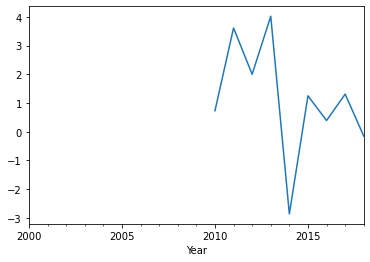

In [129]:
production['WPI First Difference'].plot()

In [130]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [131]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(production['Production'],order=(1,1,1))
model_fit=model.fit()

C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Production,WPI First Difference,forecast
Year,,,
2014,3.17,0.81,NaN
2015,2.81,0.46,NaN
2016,2.56,-0.18,NaN
2017,4.87,2.56,NaN
2018,5.00,2.00,NaN


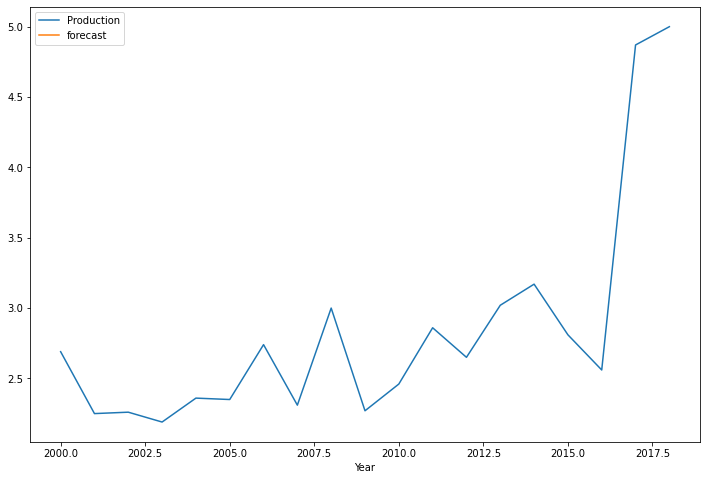

In [73]:
production['forecast']=model_fit.predict(start=10,end=20,dynamic=True)
production[['Production','forecast']].plot(figsize=(12,8))
production.tail()

In [132]:
model=sm.tsa.statespace.SARIMAX(production['Production'],order=(1, 1, 1),seasonal_order=(1,1,1,9))
results=model.fit()

C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

<AxesSubplot:xlabel='Year'>

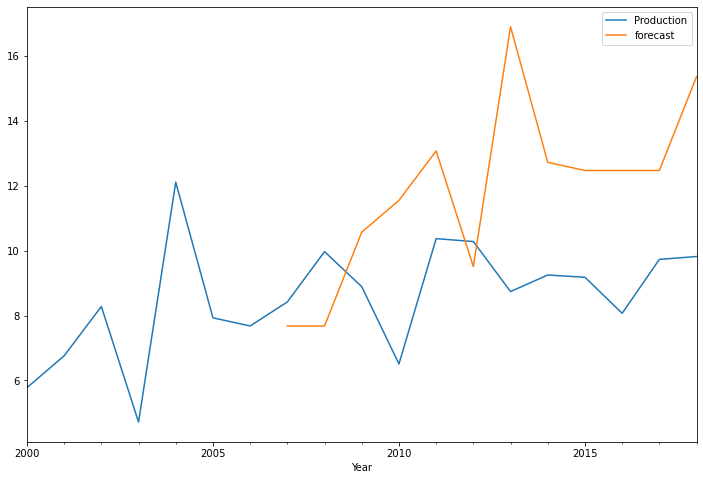

In [147]:
production['forecast']=results.predict(start=7,end=19,dynamic=True)
production[['Production','forecast']].plot(figsize=(12,8))

In [148]:
from pandas.tseries.offsets import DateOffset
future_dates=[production.index[-1]+ DateOffset(years=x)for x in range(0,10)]

In [141]:
future_dates

[Timestamp('2018-01-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2025-01-01 00:00:00'),
 Timestamp('2026-01-01 00:00:00'),
 Timestamp('2027-01-01 00:00:00')]

In [142]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=production.columns)
future_df=pd.concat([production,future_datest_df])

<AxesSubplot:>

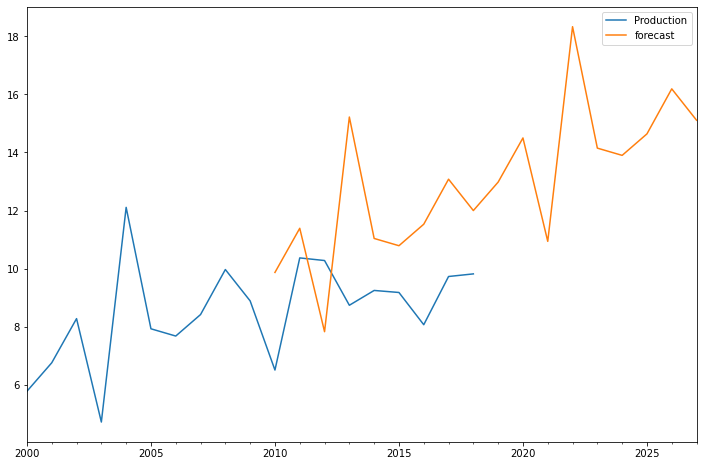

In [149]:
future_df['forecast'] = results.predict(start = 10, end = 27, dynamic= True)  
future_df[['Production', 'forecast']].plot(figsize=(12, 8)) 

In [150]:
future_df.head(50)

,Production,WPI First Difference,forecast
2000-01-01,5.78,NaN,NaN
2001-01-01,6.76,NaN,NaN
2002-01-01,8.28,NaN,NaN
2003-01-01,4.72,NaN,NaN
2004-01-01,12.11,NaN,NaN
2005-01-01,7.93,NaN,NaN
2006-01-01,7.68,NaN,NaN
2007-01-01,8.42,NaN,NaN
2008-01-01,9.97,NaN,NaN
2009-01-01,8.89,NaN,NaN


In [151]:
newproduction=future_df.iloc[18:,:]
newp1=newproduction.drop(['Production','WPI First Difference'],axis=1)
n1=newp1.index.to_numpy()
n2=newp1["forecast"]
n2.reset_index(drop=True).to_numpy()


array([11.99999953, 12.98013726, 14.5002259 , 10.93995154, 18.3303174 ,
       14.15001772, 13.90018837, 14.64005373, 16.19027855, 15.10999965])

In [152]:
print(n1[0])

2018-01-01T00:00:00.000000000


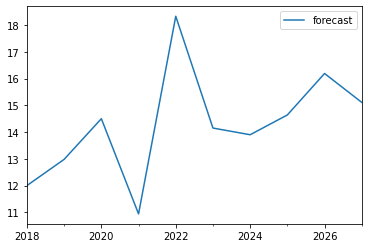

In [153]:
newp1.plot()

plt.plot(n1,n2)